pip install numpy

pip install matplotlib

pip install seaborn

In [4]:
import pandas as pd
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import requests
import glob
import datetime as dt


In [5]:
df1=pd.read_csv(r"C:\Users\abuba\Streamlit\Projects\05 SRFP\Dataset\1990-1999.csv")
df2=pd.read_csv(r"C:\Users\abuba\Streamlit\Projects\05 SRFP\Dataset\2000Feb2012.csv")
df3=pd.read_csv(r"C:\Users\abuba\Streamlit\Projects\05 SRFP\Dataset\Mar2012toDec2014.csv")
df4=pd.read_csv(r"C:\Users\abuba\Streamlit\Projects\05 SRFP\Dataset\Jan2015toDec2016.csv")
df5=pd.read_csv(r"C:\Users\abuba\Streamlit\Projects\05 SRFP\Dataset\Jan2017onwards.csv")

df=pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df

month        town         flat_type block       street_name  \
0       1990-01  ANG MO KIO            1 ROOM   309  ANG MO KIO AVE 1   
1       1990-01  ANG MO KIO            1 ROOM   309  ANG MO KIO AVE 1   
2       1990-01  ANG MO KIO            1 ROOM   309  ANG MO KIO AVE 1   
3       1990-01  ANG MO KIO            1 ROOM   309  ANG MO KIO AVE 1   
4       1990-01  ANG MO KIO            3 ROOM   216  ANG MO KIO AVE 1   
...         ...         ...               ...   ...               ...   
920122  2024-02      YISHUN         EXECUTIVE   614      YISHUN ST 61   
920123  2024-02      YISHUN         EXECUTIVE   824      YISHUN ST 81   
920124  2024-02      YISHUN         EXECUTIVE   826      YISHUN ST 81   
920125  2024-02      YISHUN         EXECUTIVE   826      YISHUN ST 81   
920126  2024-02      YISHUN  MULTI-GENERATION   666      YISHUN AVE 4   

       storey_range  floor_area_sqm        flat_model  lease_commence_date  \
0          10 TO 12            31.0          IMPROVED                 1977   
1          04 TO 06            31.0          IMPROVED                 1977   
2          10 TO 12            31.0          IMPROVED                 1977   
3          07 TO 09            31.0          IMPROVED                 1977   
4          04 TO 06            73.0    NEW GENERATION                 1976   
...             ...             ...               ...                  ...   
920122     07 TO 09           142.0         Apartment                 1987   
920123     07 TO 09           146.0        Maisonette                 1987   
920124     04 TO 06           146.0        Maisonette                 1988   
920125     01 TO 03           146.0        Maisonette                 1988   
920126     04 TO 06           164.0  Multi Generation                 1987   

        resale_price     remaining_lease  
0             9000.0                 NaN  
1             6000.0                 NaN  
2             8000.0                 NaN  
3             6000.0                 NaN  
4            47200.0                 NaN  
...              ...                 ...  
920122      800000.0  62 years 03 months  
920123      935000.0  62 years 10 months  
920124      908000.0  62 years 11 months  
920125      800000.0            63 years  
920126      998000.0  62 years 11 months  

[920127 rows x 11 columns]

In [6]:
df.shape

(920127, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920127 entries, 0 to 920126
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                920127 non-null  object 
 1   town                 920127 non-null  object 
 2   flat_type            920127 non-null  object 
 3   block                920127 non-null  object 
 4   street_name          920127 non-null  object 
 5   storey_range         920127 non-null  object 
 6   floor_area_sqm       920127 non-null  float64
 7   flat_model           920127 non-null  object 
 8   lease_commence_date  920127 non-null  int64  
 9   resale_price         920127 non-null  float64
 10  remaining_lease      211077 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.2+ MB


In [8]:
df.describe().T

count           mean            std     min       25%  \
floor_area_sqm       920127.0      95.694642      25.838481    28.0      73.0   
lease_commence_date  920127.0    1988.200996      10.585137  1966.0    1981.0   
resale_price         920127.0  318640.316005  168599.105340  5000.0  192000.0   

                          50%       75%        max  
floor_area_sqm           93.0     113.0      307.0  
lease_commence_date    1986.0    1996.0     2022.0  
resale_price         295000.0  415000.0  1568888.0

In [9]:
df['resale_price'].value_counts()

resale_price
300000.0    6902
350000.0    6803
280000.0    6543
320000.0    6505
250000.0    6283
            ... 
102080.0       1
143450.0       1
269001.0       1
400998.0       1
545555.0       1
Name: count, Length: 9414, dtype: int64

## DATA CLEANING

In [11]:
df.nunique()

month                   410
town                     27
flat_type                 8
block                  2706
street_name             584
storey_range             25
floor_area_sqm          211
flat_model               34
lease_commence_date      56
resale_price           9414
remaining_lease         722
dtype: int64

In [12]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

## REMAINING_LEASE

In [14]:
df.sample(5)

month             town flat_type block          street_name  \
605058  2010-04       ANG MO KIO    3 ROOM   560    ANG MO KIO AVE 10   
200441  1998-07            BEDOK    3 ROOM   425         BEDOK NTH RD   
658053  2012-03  KALLANG/WHAMPOA    3 ROOM    85           WHAMPOA DR   
590545  2009-10        WOODLANDS    4 ROOM   620      WOODLANDS DR 52   
379110  2002-07      BUKIT BATOK    3 ROOM   230  BT BATOK EAST AVE 3   

       storey_range  floor_area_sqm      flat_model  lease_commence_date  \
605058     01 TO 03            67.0  New Generation                 1980   
200441     10 TO 12            67.0  NEW GENERATION                 1979   
658053     01 TO 05            65.0        Improved                 1974   
590545     10 TO 12            91.0        Model A2                 1998   
379110     01 TO 03            67.0  New Generation                 1985   

        resale_price remaining_lease  
605058      244000.0             NaN  
200441      158000.0             NaN  
658053      298000.0             NaN  
590545      295000.0             NaN  
379110      102000.0             NaN

In [15]:
def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row

In [16]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [17]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

month    town         flat_type block   street_name storey_range  \
920122  2024-02  YISHUN         EXECUTIVE   614  YISHUN ST 61     07 TO 09   
920123  2024-02  YISHUN         EXECUTIVE   824  YISHUN ST 81     07 TO 09   
920124  2024-02  YISHUN         EXECUTIVE   826  YISHUN ST 81     04 TO 06   
920125  2024-02  YISHUN         EXECUTIVE   826  YISHUN ST 81     01 TO 03   
920126  2024-02  YISHUN  MULTI-GENERATION   666  YISHUN AVE 4     04 TO 06   

        floor_area_sqm        flat_model  lease_commence_date  resale_price  \
920122           142.0         Apartment                 1987      800000.0   
920123           146.0        Maisonette                 1987      935000.0   
920124           146.0        Maisonette                 1988      908000.0   
920125           146.0        Maisonette                 1988      800000.0   
920126           164.0  Multi Generation                 1987      998000.0   

        remaining_lease  
920122        62.250000  
920123        62.833333  
920124        62.916667  
920125        63.000000  
920126        62.916667

In [18]:
df['remaining_lease'].value_counts()

remaining_lease
68.000000    711638
95.000000      2317
67.000000      2209
69.000000      1911
71.000000      1753
              ...  
97.583333         1
97.750000         1
97.250000         1
41.750000         1
96.833333         1
Name: count, Length: 669, dtype: int64

In [19]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [20]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

In [21]:
#Month column

# Separate the year and month of resale beacuse this is time series Data
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(3)

town flat_type block       street_name storey_range  floor_area_sqm  \
0  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12            31.0   
1  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06            31.0   
2  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12            31.0   

  flat_model  lease_commence_date  resale_price  remaining_lease resale_year  \
0   IMPROVED                 1977        9000.0             68.0        1990   
1   IMPROVED                 1977        6000.0             68.0        1990   
2   IMPROVED                 1977        8000.0             68.0        1990   

  resale_month  
0           01  
1           01  
2           01

In [22]:
# Split the 'Range' column into lower and upper bounds
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.head(3)

town flat_type block       street_name storey_range  floor_area_sqm  \
0  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12            31.0   
1  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06            31.0   
2  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12            31.0   

  flat_model  lease_commence_date  resale_price  remaining_lease resale_year  \
0   IMPROVED                 1977        9000.0             68.0        1990   
1   IMPROVED                 1977        6000.0             68.0        1990   
2   IMPROVED                 1977        8000.0             68.0        1990   

  resale_month  storey_lower_bound  storey_upper_bound  
0           01                  10                  12  
1           01                   4                   6  
2           01                  10                  12

In [23]:
df.drop('storey_range', axis = 1, inplace= True)

In [24]:
df.sample(5)

town flat_type block     street_name  floor_area_sqm  flat_model  \
251088     YISHUN    4 ROOM   607    YISHUN ST 61            83.0  SIMPLIFIED   
646629  TOA PAYOH    3 ROOM   195    KIM KEAT AVE            66.0    Improved   
359209   TAMPINES    3 ROOM   406  TAMPINES ST 41            64.0  Simplified   
554758     BISHAN    3 ROOM   185    BISHAN ST 13            64.0  Simplified   
741236   TAMPINES    4 ROOM   282  TAMPINES ST 22           103.0     Model A   

        lease_commence_date  resale_price  remaining_lease resale_year  \
251088                 1987      172000.0             68.0        1999   
646629                 1973      292000.0             68.0        2011   
359209                 1986      145000.0             68.0        2001   
554758                 1988      290000.0             68.0        2008   
741236                 1984      405000.0             66.0        2016   

       resale_month  storey_lower_bound  storey_upper_bound  
251088           04                   1                   3  
646629           08                   7                   9  
359209           12                   7                   9  
554758           08                   4                   6  
741236           09                   4                   6

In [25]:
df.dtypes

town                    object
flat_type               object
block                   object
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year             object
resale_month            object
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

In [26]:
# CONVERTING

df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [27]:
df.head(3)

town flat_type  block       street_name  floor_area_sqm flat_model  \
0  ANG MO KIO    1 ROOM  309.0  ANG MO KIO AVE 1            31.0   IMPROVED   
1  ANG MO KIO    1 ROOM  309.0  ANG MO KIO AVE 1            31.0   IMPROVED   
2  ANG MO KIO    1 ROOM  309.0  ANG MO KIO AVE 1            31.0   IMPROVED   

   lease_commence_date  resale_price  remaining_lease  resale_year  \
0                 1977        9000.0             68.0         1990   
1                 1977        6000.0             68.0         1990   
2                 1977        8000.0             68.0         1990   

   resale_month  storey_lower_bound  storey_upper_bound  
0             1                  10                  12  
1             1                   4                   6  
2             1                  10                  12

In [28]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

## STRING FORMAT CORRECTION

In [30]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [31]:
df['town'].value_counts()

town
TAMPINES           79450
YISHUN             69597
BEDOK              66301
JURONG WEST        66184
WOODLANDS          65042
ANG MO KIO         51828
HOUGANG            50362
BUKIT BATOK        43972
CHOA CHU KANG      37975
BUKIT MERAH        34084
PASIR RIS          33052
SENGKANG           31989
TOA PAYOH          31352
QUEENSTOWN         28602
GEYLANG            28028
CLEMENTI           27896
BUKIT PANJANG      27484
KALLANG/WHAMPOA    26955
JURONG EAST        24632
SERANGOON          22711
BISHAN             21171
PUNGGOL            20165
SEMBAWANG          13627
MARINE PARADE       8005
CENTRAL AREA        7096
BUKIT TIMAH         2503
LIM CHU KANG          64
Name: count, dtype: int64

In [32]:
df['flat_type'].value_counts()

flat_type
4 ROOM              349364
3 ROOM              294235
5 ROOM              193825
EXECUTIVE            69229
2 ROOM               11633
1 ROOM                1300
MULTI GENERATION       279
MULTI-GENERATION       262
Name: count, dtype: int64

In [33]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [34]:
df['flat_type'].value_counts()

flat_type
4 ROOM              349364
3 ROOM              294235
5 ROOM              193825
EXECUTIVE            69229
2 ROOM               11633
1 ROOM                1300
MULTI GENERATION       541
Name: count, dtype: int64

In [35]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17521
BEDOK RESERVOIR RD    14664
ANG MO KIO AVE 10     13756
ANG MO KIO AVE 3      12106
HOUGANG AVE 8          9317
                      ...  
GEYLANG EAST AVE 2       15
SEMBAWANG WAY            14
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [36]:
df['flat_model'].value_counts()

flat_model
Model A                   191973
Improved                  166550
New Generation            109274
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          46082
Simplified                 34041
Apartment                  25355
Standard                   25000
SIMPLIFIED                 23258
STANDARD                   17375
Maisonette                 17285
MAISONETTE                 12215
Model A2                   10064
APARTMENT                   9901
DBSS                        3238
Adjoined flat               1238
Model A-Maisonette          1083
MODEL A-MAISONETTE           982
Terrace                      443
Type S1                      431
MULTI GENERATION             279
Multi Generation             262
TERRACE                      247
Type S2                      214
Premium Apartment Loft       107
2-room                        97
Premium Maisonette            86
Improved-Maisonette           81

In [37]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [38]:
df['flat_model'].value_counts()

flat_model
Model A                   262354
Improved                  240139
New Generation            188172
Simplified                 57299
Premium Apartment          46088
Standard                   42375
Apartment                  35256
Maisonette                 29500
Model A2                   10064
DBSS                        3238
Model A-Maisonette          2065
Adjoined flat               1238
Terrace                      690
Multi Generation             541
Type S1                      431
Type S2                      214
Improved-Maisonette          125
2-room                       118
Premium Apartment Loft       107
Premium Maisonette            86
3Gen                          27
Name: count, dtype: int64

## CHECK DUPLICATES

In [40]:
df.duplicated().sum()

2333

In [41]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## HANDLING OUTLIERS

In [43]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [44]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

In [45]:
integer_data_cols1 = ['lease_commence_date', 'storey_lower_bound', 'storey_upper_bound'] 

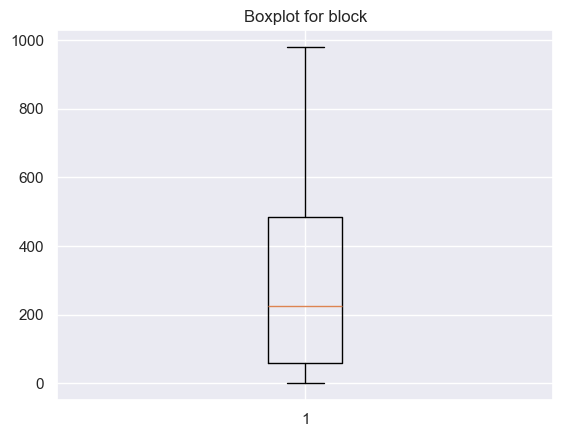

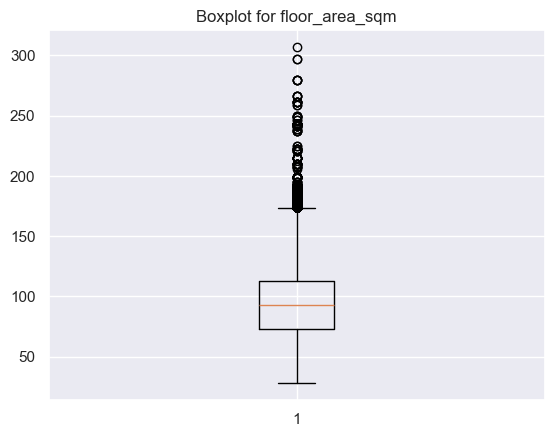

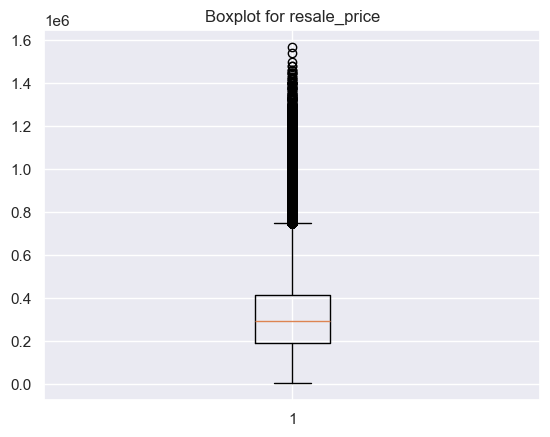

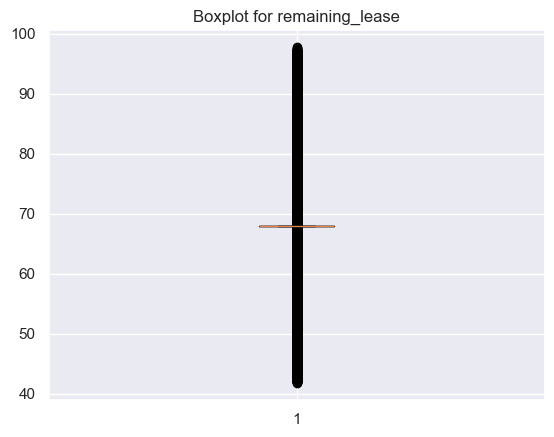

In [46]:
for _ in float_data_cols:    
    plt.boxplot(df[_] )
    plt.title(f'Boxplot for {_}')
    plt.show()

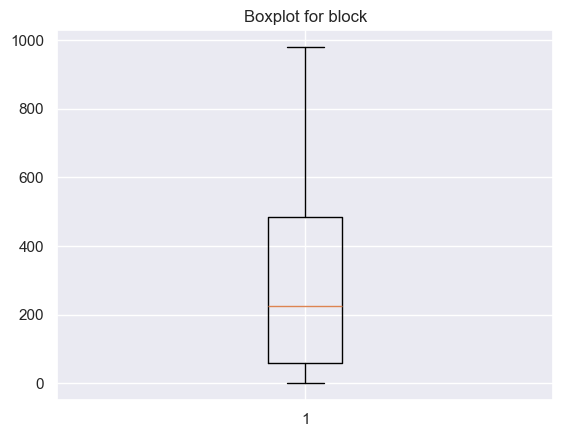

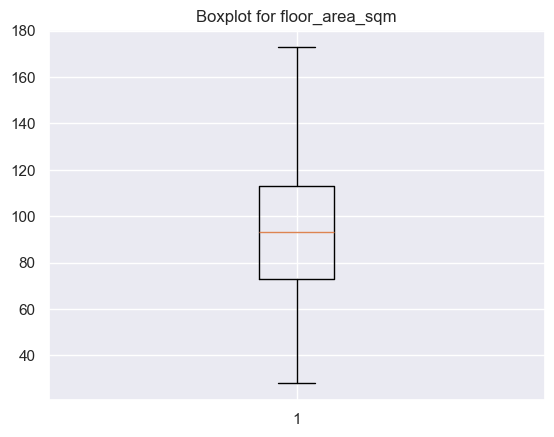

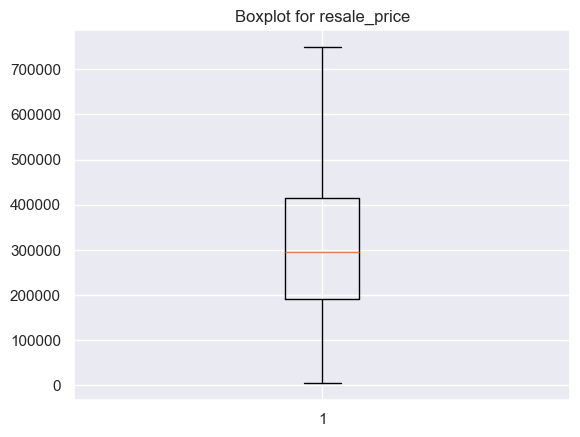

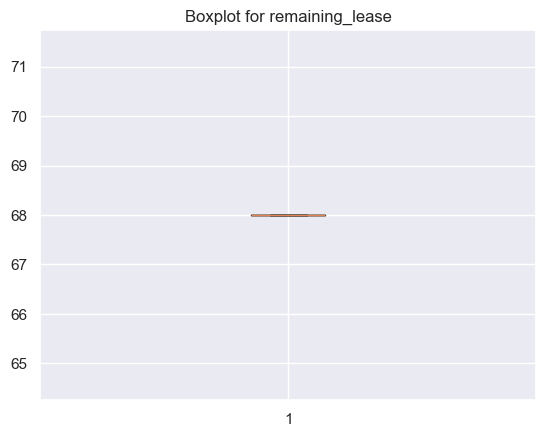

In [47]:
for _ in float_data_cols:    
    Q1 = df[_].quantile(0.25)
    Q3 = df[_].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Clip values in the current column based on the calculated bounds
    df[_] = df[_].clip(lower_bound, upper_bound)

    # Boxplot to visualize the distribution and identify potential outliers
    plt.boxplot(df[_])
    plt.title(f'Boxplot for {_}')
    plt.show()

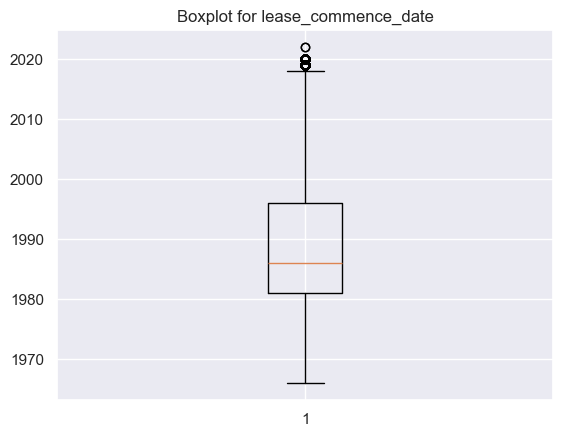

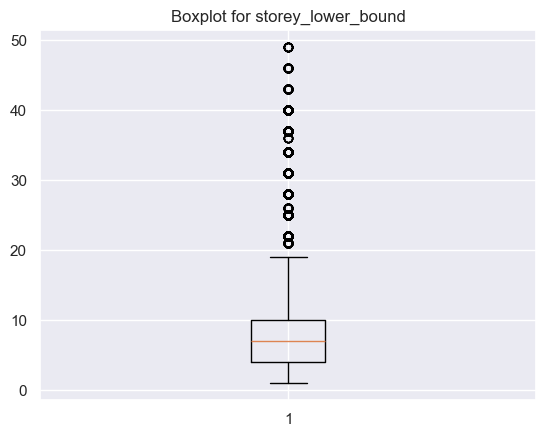

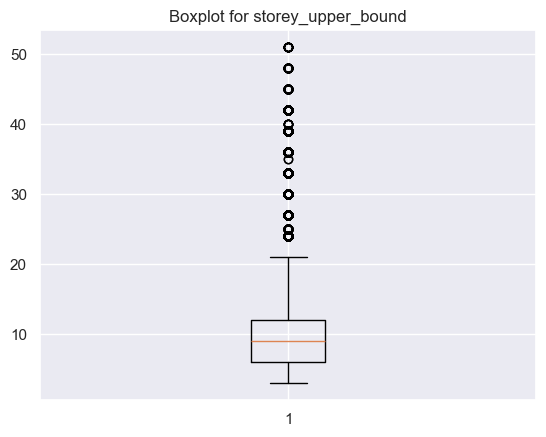

In [48]:
for _ in integer_data_cols1:    
    plt.boxplot(df[_] )
    plt.title(f'Boxplot for {_}')
    plt.show()

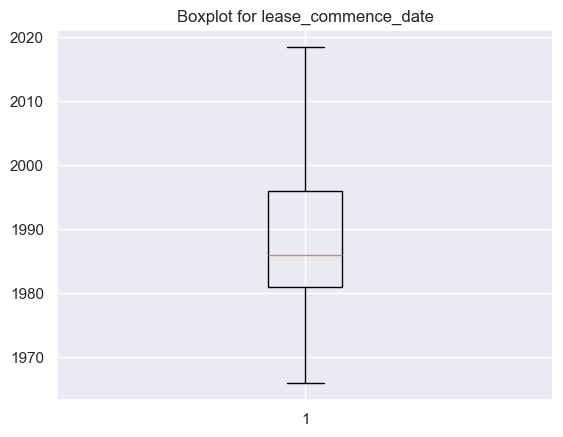

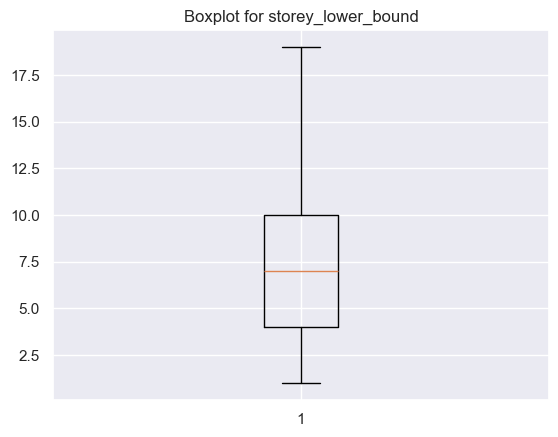

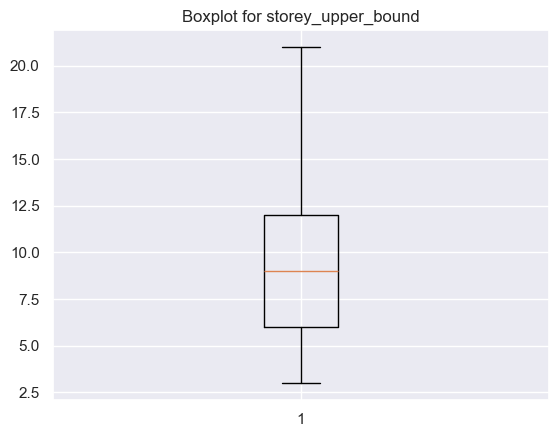

In [49]:
for _ in integer_data_cols1:    
    Q1 = df[_].quantile(0.25)
    Q3 = df[_].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Clip values in the current column based on the calculated bounds
    df[_] = df[_].clip(lower_bound, upper_bound)

    # Boxplot to visualize the distribution and identify potential outliers
    plt.boxplot(df[_])
    plt.title(f'Boxplot for {_}')
    plt.show()

## EDA

### Categorical vs Frequency

In [52]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

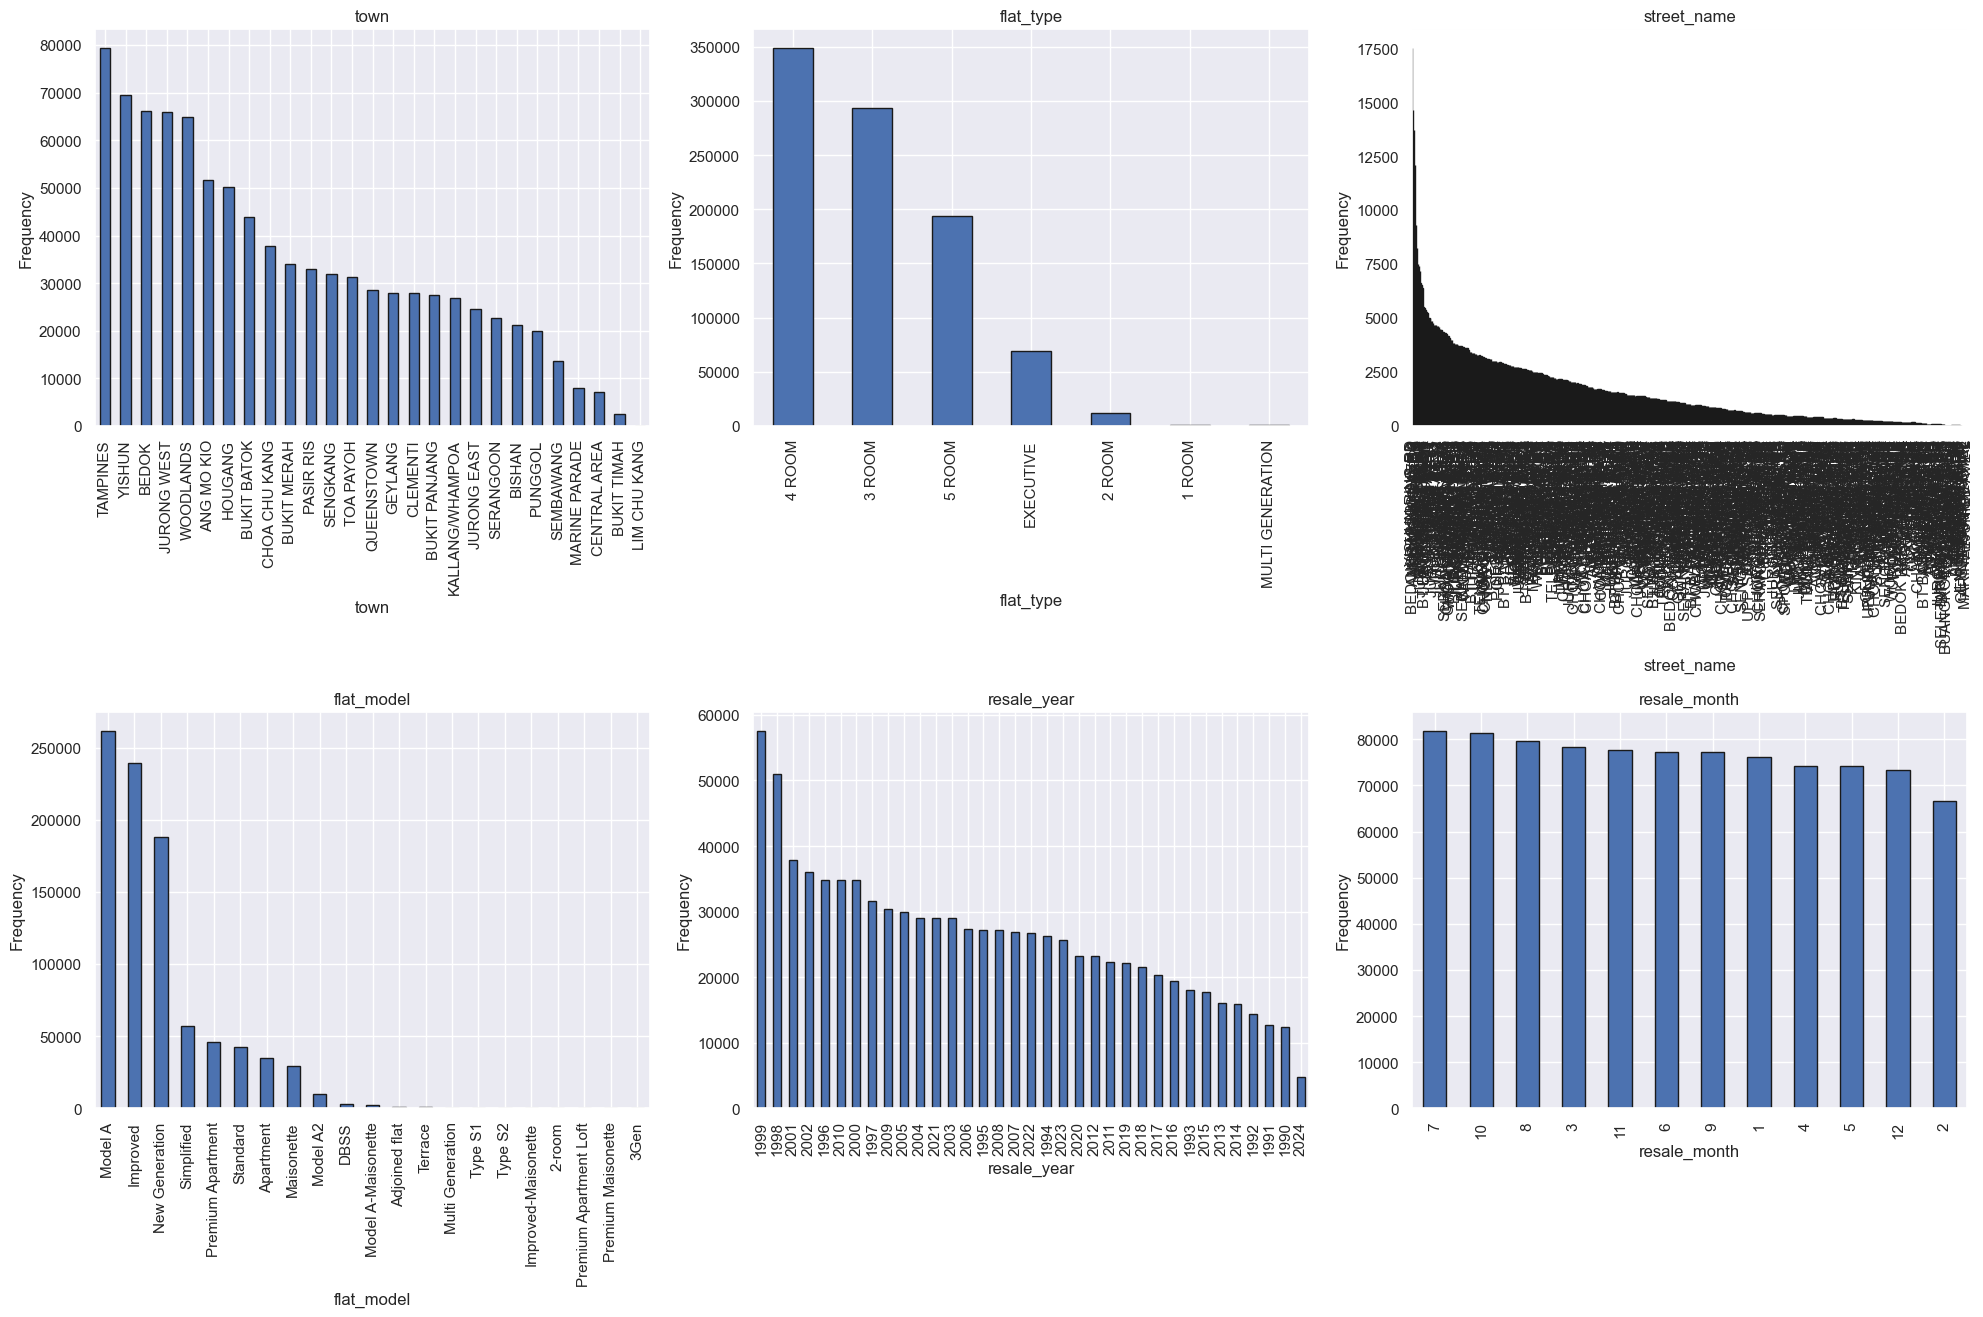

In [53]:
import matplotlib.pyplot as plt

columns_to_plot = ['town', 'flat_type', 'street_name', 'flat_model', 'resale_year', 'resale_month']
num_plots = len(columns_to_plot)

plt.figure(figsize=(20, 25))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(4, 3, i)
    df[column].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Feature vs Target

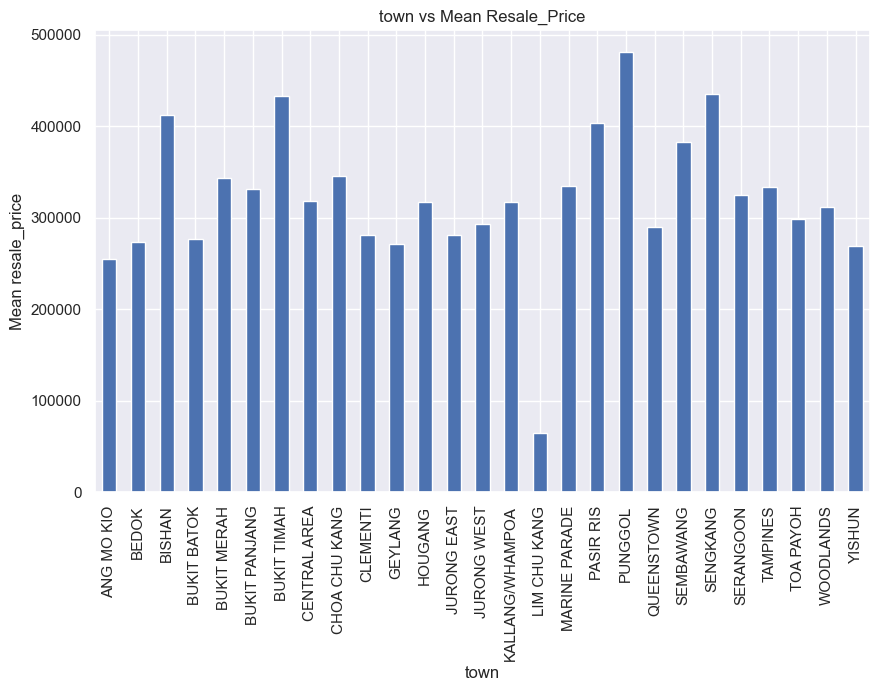

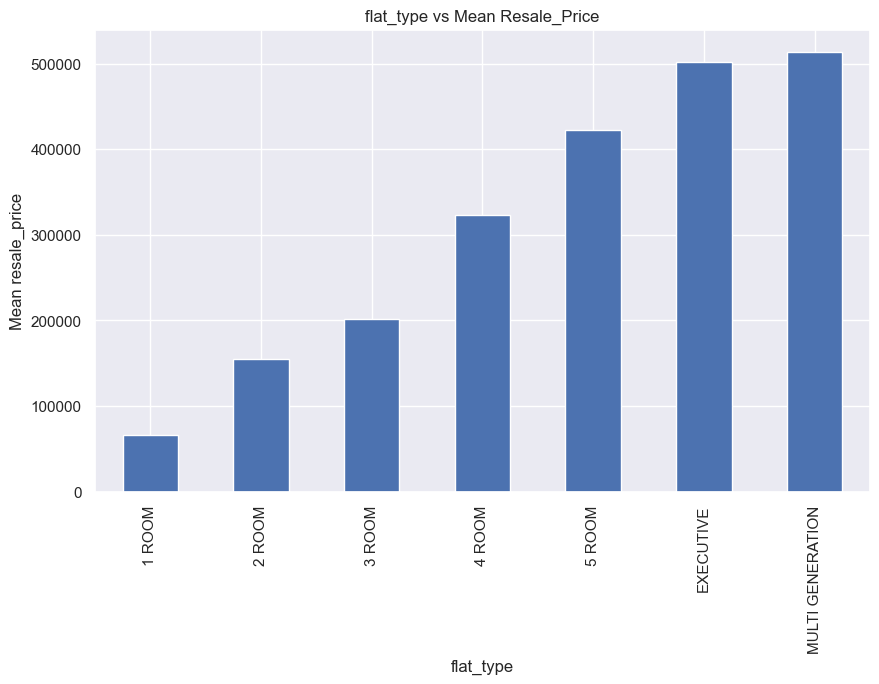

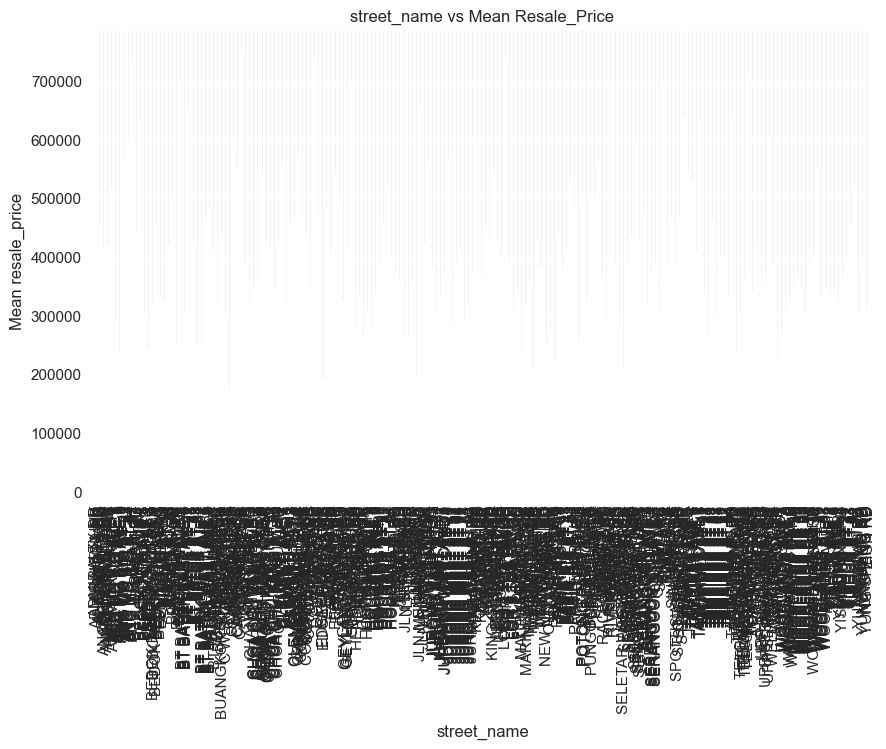

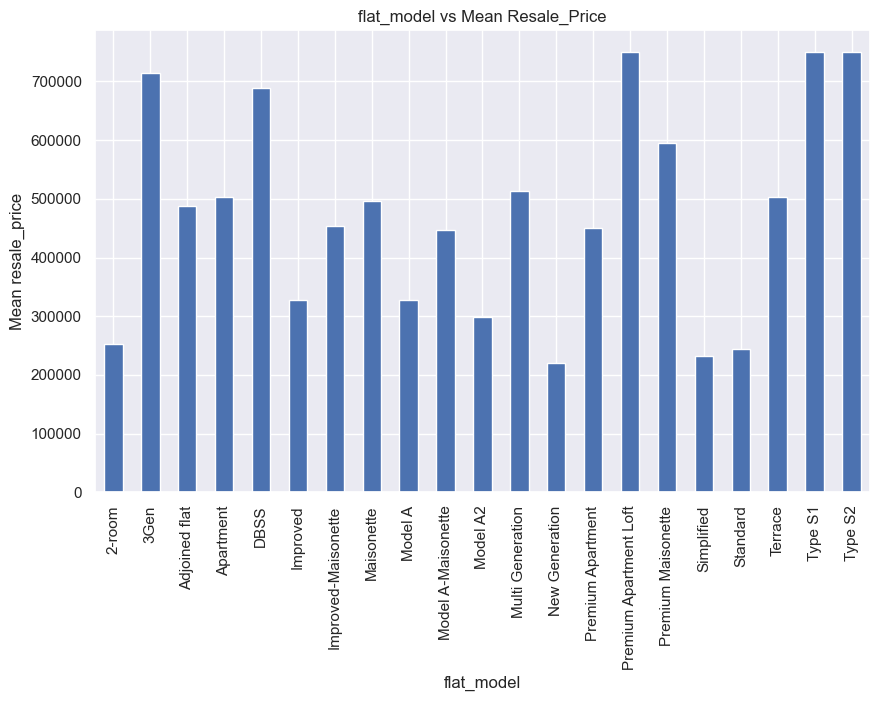

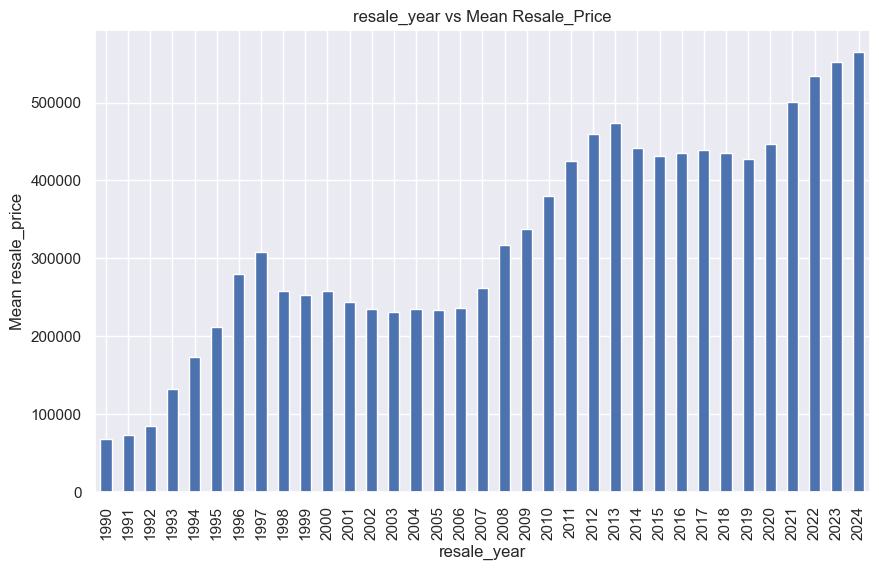

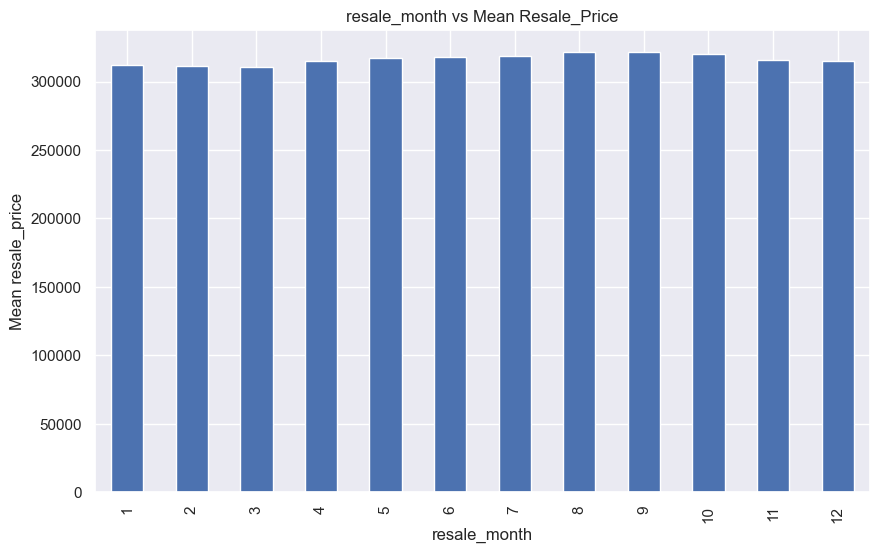

In [98]:
# List of features to plot
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Resale_Price')
    plt.show()

In [56]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease']

In [57]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

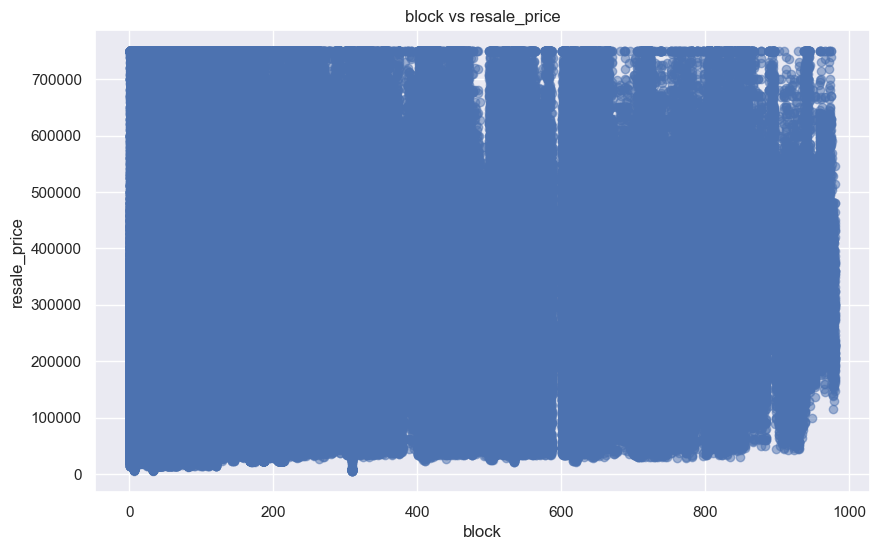

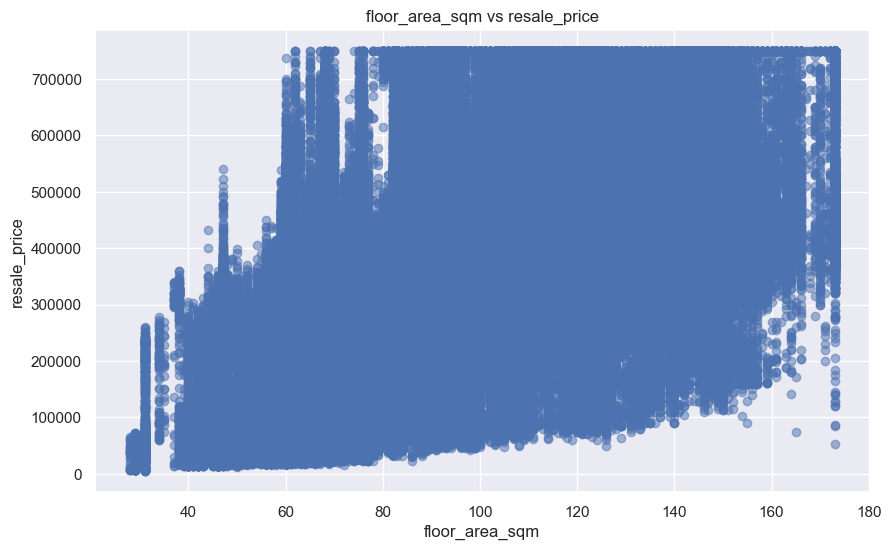

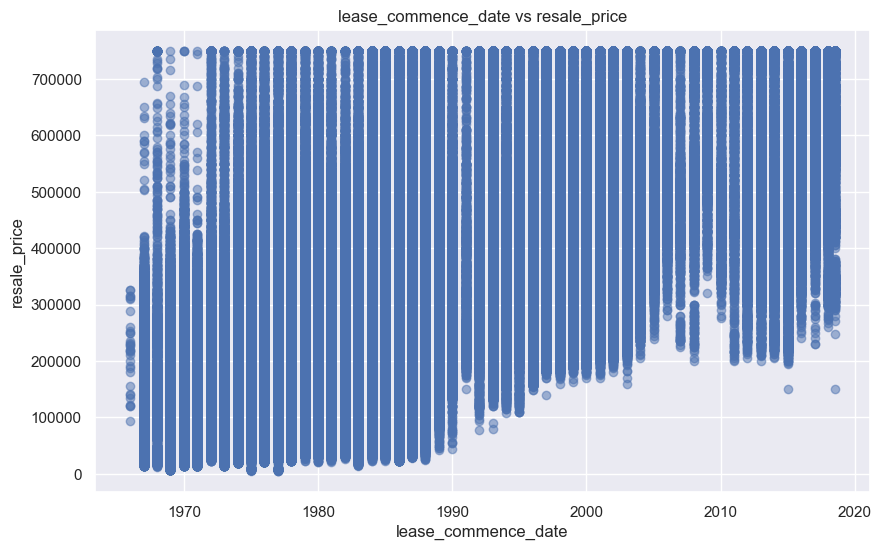

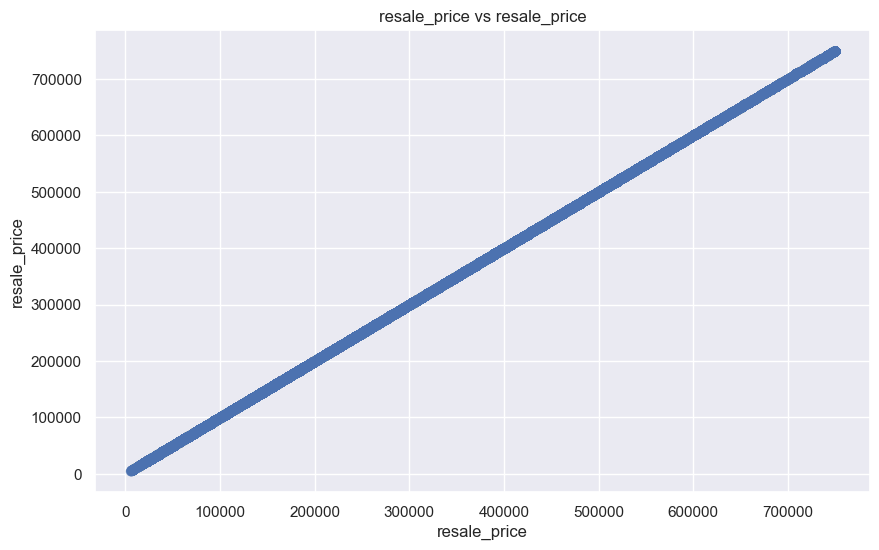

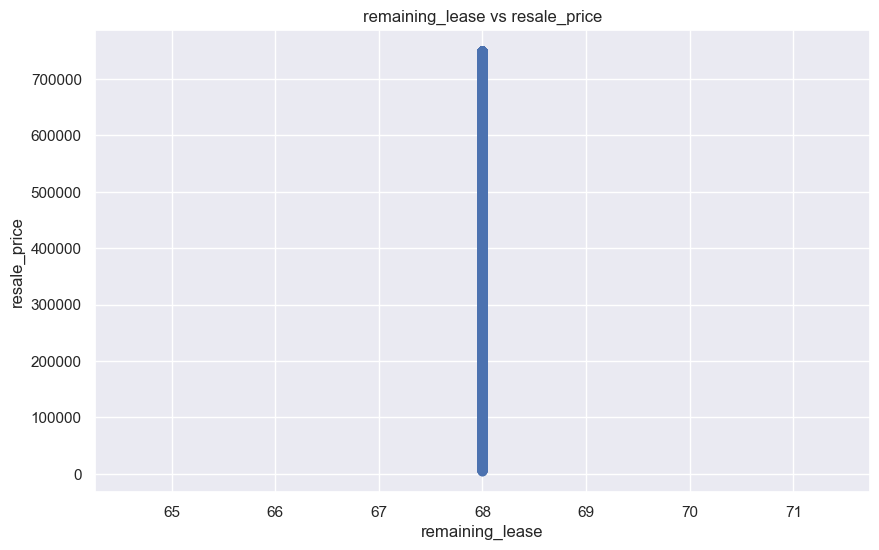

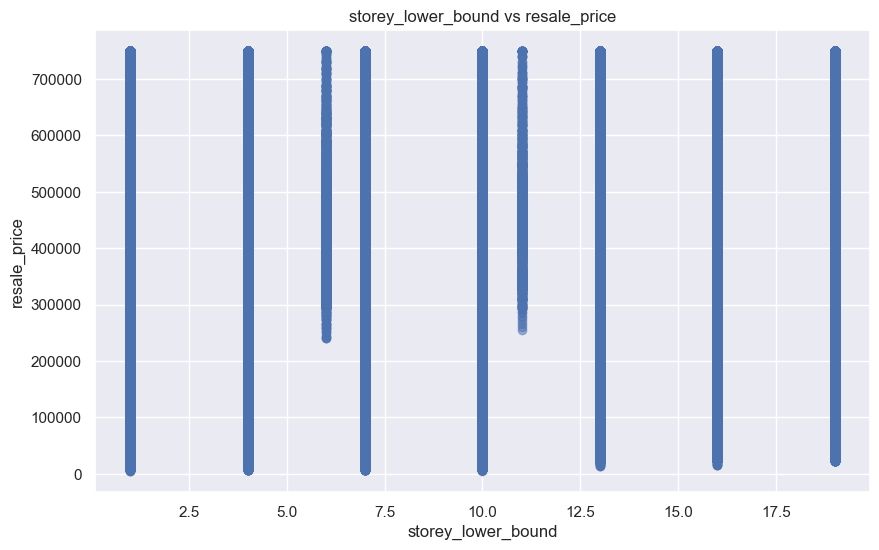

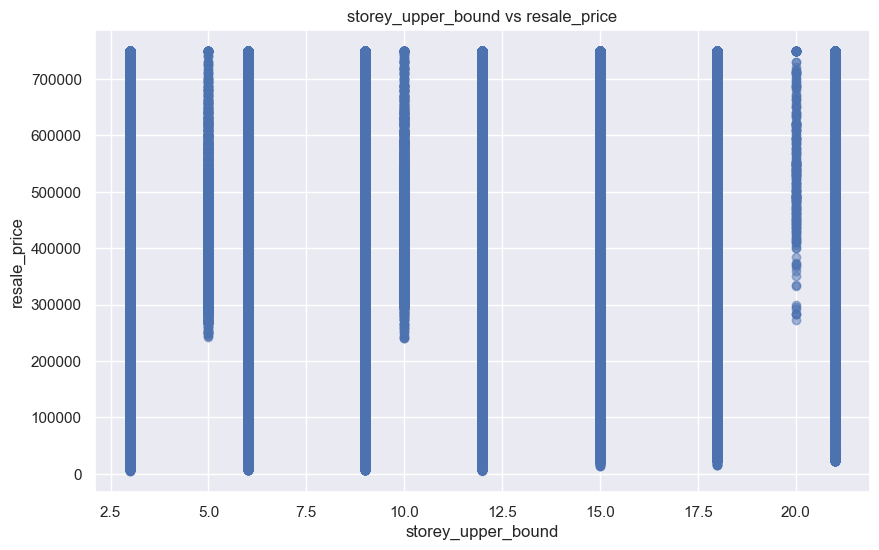

In [58]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound', 
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

## Encoding

In [60]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [61]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [62]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [63]:
# alter the column with the mapped numbers
df1['street_name'] = df1['street_name'].map(streets_mapping)

# Display the DataFrame
df1.head(3)

town flat_type  block  street_name  floor_area_sqm flat_model  \
0  ANG MO KIO    1 ROOM  309.0            1            31.0   Improved   
1  ANG MO KIO    1 ROOM  309.0            1            31.0   Improved   
2  ANG MO KIO    1 ROOM  309.0            1            31.0   Improved   

   lease_commence_date  resale_price  remaining_lease  resale_year  \
0               1977.0        9000.0             68.0         1990   
1               1977.0        6000.0             68.0         1990   
2               1977.0        8000.0             68.0         1990   

   resale_month  storey_lower_bound  storey_upper_bound  
0             1                  10                  12  
1             1                   4                   6  
2             1                  10                  12

In [64]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [65]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

# Display the DataFrame
df1.head(3)

town  flat_type  block  street_name  floor_area_sqm flat_model  \
0  ANG MO KIO          1  309.0            1            31.0   Improved   
1  ANG MO KIO          1  309.0            1            31.0   Improved   
2  ANG MO KIO          1  309.0            1            31.0   Improved   

   lease_commence_date  resale_price  remaining_lease  resale_year  \
0               1977.0        9000.0             68.0         1990   
1               1977.0        6000.0             68.0         1990   
2               1977.0        8000.0             68.0         1990   

   resale_month  storey_lower_bound  storey_upper_bound  
0             1                  10                  12  
1             1                   4                   6  
2             1                  10                  12

In [66]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# Display the DataFrame
df1.head(3)

town  flat_type  block  street_name  floor_area_sqm  flat_model  \
0  ANG MO KIO          1  309.0            1            31.0          14   
1  ANG MO KIO          1  309.0            1            31.0          14   
2  ANG MO KIO          1  309.0            1            31.0          14   

   lease_commence_date  resale_price  remaining_lease  resale_year  \
0               1977.0        9000.0             68.0         1990   
1               1977.0        6000.0             68.0         1990   
2               1977.0        8000.0             68.0         1990   

   resale_month  storey_lower_bound  storey_upper_bound  
0             1                  10                  12  
1             1                   4                   6  
2             1                  10                  12

In [67]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

# Display the DataFrame
df1.head(4)

town  flat_type  block  street_name  floor_area_sqm  flat_model  \
0     1          1  309.0            1            31.0          14   
1     1          1  309.0            1            31.0          14   
2     1          1  309.0            1            31.0          14   
3     1          1  309.0            1            31.0          14   

   lease_commence_date  resale_price  remaining_lease  resale_year  \
0               1977.0        9000.0             68.0         1990   
1               1977.0        6000.0             68.0         1990   
2               1977.0        8000.0             68.0         1990   
3               1977.0        6000.0             68.0         1990   

   resale_month  storey_lower_bound  storey_upper_bound  
0             1                  10                  12  
1             1                   4                   6  
2             1                  10                  12  
3             1                   7                   9

In [68]:
# save the processed data for the deployment
df1.to_csv('final.csv')

## CHECK CORRELATION

In [70]:
# correlation matrix (ranges from 1 to -1)
corrm=df1.corr()
#corrm.to_csv('corrm.csv')
corrm

town  flat_type     block  street_name  \
town                 1.000000   0.208890  0.051490     0.587765   
flat_type            0.208890   1.000000  0.127847     0.388553   
block                0.051490   0.127847  1.000000     0.050038   
street_name          0.587765   0.388553  0.050038     1.000000   
floor_area_sqm       0.201817   0.954841  0.187484     0.357766   
flat_model           0.163467   0.243348 -0.001947     0.354278   
lease_commence_date  0.334476   0.413678  0.011430     0.739691   
resale_price         0.123486   0.605221 -0.079201     0.378908   
remaining_lease           NaN        NaN       NaN          NaN   
resale_year          0.124451   0.102312 -0.113488     0.317381   
resale_month         0.004703   0.003655  0.000510     0.008652   
storey_lower_bound  -0.019401   0.078041 -0.123760     0.080731   
storey_upper_bound  -0.019132   0.078377 -0.123805     0.081388   

                     floor_area_sqm  flat_model  lease_commence_date  \
town                       0.201817    0.163467             0.334476   
flat_type                  0.954841    0.243348             0.413678   
block                      0.187484   -0.001947             0.011430   
street_name                0.357766    0.354278             0.739691   
floor_area_sqm             1.000000    0.201163             0.392408   
flat_model                 0.201163    1.000000             0.357625   
lease_commence_date        0.392408    0.357625             1.000000   
resale_price               0.580207    0.246589             0.541207   
remaining_lease                 NaN         NaN                  NaN   
resale_year                0.064234    0.163235             0.428036   
resale_month               0.002775    0.002486             0.008524   
storey_lower_bound         0.044372    0.019208             0.151590   
storey_upper_bound         0.044562    0.019575             0.152022   

                     resale_price  remaining_lease  resale_year  resale_month  \
town                     0.123486              NaN     0.124451      0.004703   
flat_type                0.605221              NaN     0.102312      0.003655   
block                   -0.079201              NaN    -0.113488      0.000510   
street_name              0.378908              NaN     0.317381      0.008652   
floor_area_sqm           0.580207              NaN     0.064234      0.002775   
flat_model               0.246589              NaN     0.163235      0.002486   
lease_commence_date      0.541207              NaN     0.428036      0.008524   
resale_price             1.000000              NaN     0.677827      0.013918   
remaining_lease               NaN              NaN          NaN           NaN   
resale_year              0.677827              NaN     1.000000     -0.015627   
resale_month             0.013918              NaN    -0.015627      1.000000   
storey_lower_bound       0.209014              NaN     0.095665     -0.000928   
storey_upper_bound       0.211771              NaN     0.097806     -0.003402   

                     storey_lower_bound  storey_upper_bound  
town                          -0.019401           -0.019132  
flat_type                      0.078041            0.078377  
block                         -0.123760           -0.123805  
street_name                    0.080731            0.081388  
floor_area_sqm                 0.044372            0.044562  
flat_model                     0.019208            0.019575  
lease_commence_date            0.151590            0.152022  
resale_price                   0.209014            0.211771  
remaining_lease                     NaN                 NaN  
resale_year                    0.095665            0.097806  
resale_month                  -0.000928           -0.003402  
storey_lower_bound             1.000000            0.999267  
storey_upper_bound             0.999267            1.000000

## HEATMAP

<Axes: >

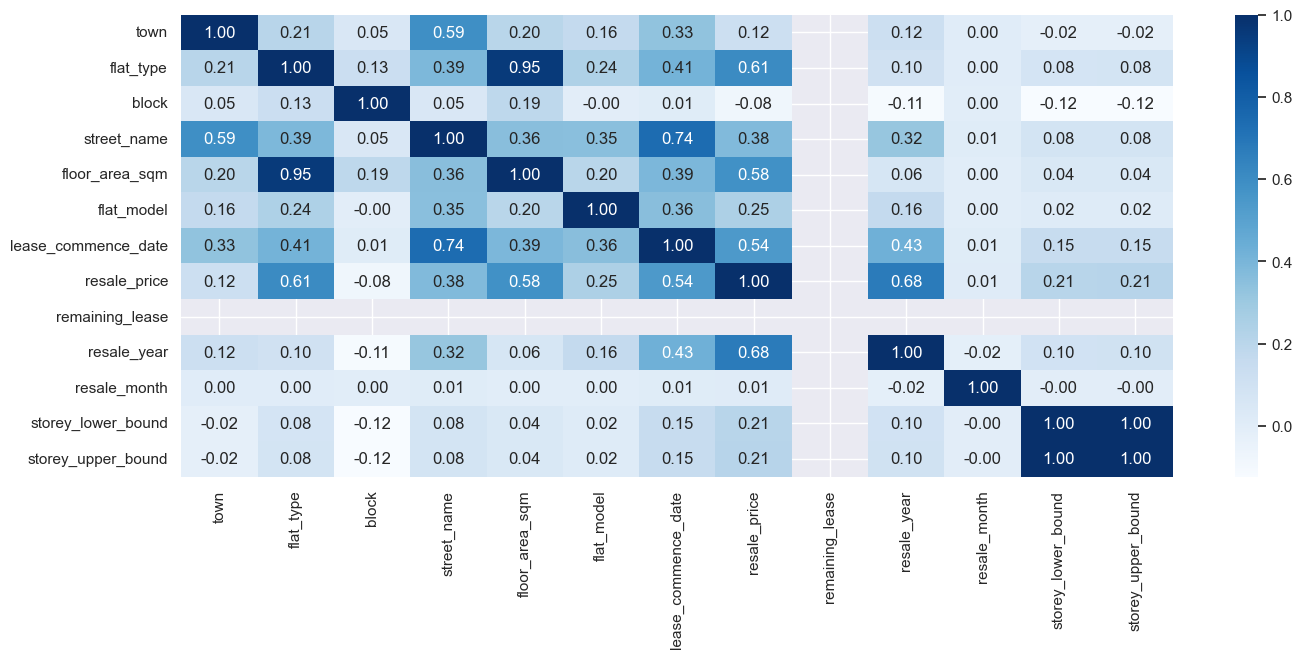

In [72]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

## REGRESSION

In [74]:
# assign feature and target variable
X = df1.drop('resale_price', axis= 1)
y = df1['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## SCALING

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[-0.59692255, -0.01490074,  0.09261679, ...,  0.41905439,
         -1.25407467, -1.25765044],
        [ 1.07034649, -1.06931896, -0.67656431, ..., -0.75029583,
          0.09500363,  0.09172182],
        [-0.08391669, -0.01490074,  0.84275875, ..., -1.04263339,
         -1.25407467, -1.25765044],
        ...,
        [-1.23817987, -0.01490074, -0.48236512, ...,  0.41905439,
         -0.57953552, -0.58296431],
        [ 0.04433478, -0.01490074, -0.72225824, ...,  1.00372951,
         -1.25407467, -1.25765044],
        [ 0.81384357, -1.06931896, -1.02307659, ..., -0.75029583,
          0.76954278,  0.76640795]]),
 array([[-0.08391669, -0.01490074,  2.42681487, ..., -0.75029583,
          0.76954278,  0.76640795],
        [-0.72517401, -0.01490074,  0.46959168, ...,  1.29606706,
          0.76954278,  0.76640795],
        [-1.4946828 , -1.06931896, -1.01165311, ...,  0.41905439,
         -0.57953552, -0.58296431],
        ...,
        [-0.34041962, -1.06931896,  0.05453851, ..., -

!pip install xgboost

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def train_and_evaluate_regressor(regressor, X_train, y_train, X_test, y_test):
    # Train the model
    regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = regressor.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the results
    print(f"Mean Absolute Error (MAE)    : {mae}")
    print(f"Mean Squared Error (MSE)     : {mse}")
    print(f"Root Mean Square Error (RMSE): {rmse}")
    print(f"R-squared (R2) Score         : {r2}")

    return mae, mse, rmse, r2

# Linear Regression
linear_model = LinearRegression(fit_intercept=True)
print('Linear')
train_and_evaluate_regressor(linear_model, X_train, y_train, X_test, y_test)

# K Nearest Neighbors Regression
knn_regressor = KNeighborsRegressor(n_neighbors=5)
print('KNN')
train_and_evaluate_regressor(knn_regressor, X_train_scaled, y_train, X_test_scaled, y_test)

# Decision Tree Regression
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
print('Decision Tree')
train_and_evaluate_regressor(dt_regressor, X_train, y_train, X_test, y_test)

# Random Forest Regression
rf_regressor = RandomForestRegressor(random_state=42)
print('Random Forest')
train_and_evaluate_regressor(rf_regressor, X_train, y_train, X_test, y_test)

# XGBoost Regression
xgregressor = XGBRegressor()
print('XGBoost')
train_and_evaluate_regressor(xgregressor, X_train, y_train, X_test, y_test)


Linear
Mean Absolute Error (MAE)    : 56948.97415807592
Mean Squared Error (MSE)     : 5486673201.203093
Root Mean Square Error (RMSE): 74072.08111834778
R-squared (R2) Score         : 0.7885570094907619
KNN
Mean Absolute Error (MAE)    : 28757.586720977994
Mean Squared Error (MSE)     : 1761493908.2490814
Root Mean Square Error (RMSE): 41970.15497051543
R-squared (R2) Score         : 0.9321163251271607
Decision Tree
Mean Absolute Error (MAE)    : 17324.083564125467
Mean Squared Error (MSE)     : 663381304.9996059
Root Mean Square Error (RMSE): 25756.189644425394
R-squared (R2) Score         : 0.9744349040241215
Random Forest
Mean Absolute Error (MAE)    : 13794.230844614929
Mean Squared Error (MSE)     : 398124140.46096677
Root Mean Square Error (RMSE): 19953.048400206088
R-squared (R2) Score         : 0.9846572675707151
XGBoost
Mean Absolute Error (MAE)    : 16799.161114485658
Mean Squared Error (MSE)     : 550731585.191916
Root Mean Square Error (RMSE): 23467.671064507358
R-squared 

(16799.161114485658, 550731585.191916, 23467.671064507358, 0.9787761492127255)

In [79]:
# Existing code for training and evaluating regression models

# ... (previous code)

# Create a list of model names and their corresponding R2 scores
models = ['Linear Regression', 'K Neighbors Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGBoost Regressor']
scores = [linear_model.score(X_test, y_test),
          knn_regressor.score(X_test_scaled, y_test),
          dt_regressor.score(X_test, y_test),
          rf_regressor.score(X_test, y_test),
          xgregressor.score(X_test, y_test)]

# Plot the R2 scores
fig = px.bar(x=models, y=scores, title='R2 Scores of Regression Models')
fig.show()

# Find the best-fit model based on the maximum R2 score
max_score = max(scores)
best_model = models[scores.index(max_score)]

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R2 SCORE\n")
for model, score in zip(models, scores):
    print(f"{model}: {score}")

print(f"\nModel: {best_model} has the Maximum R2 Score: {max_score}")


FINDING BEST FIT MODEL FOR EVALUATION BASED ON R2 SCORE

Linear Regression: 0.7885570094907619
K Neighbors Regressor: 0.9321163251271607
Decision Tree Regressor: 0.9744349040241215
Random Forest Regressor: 0.9846572675707151
XGBoost Regressor: 0.9787761492127255

Model: Random Forest Regressor has the Maximum R2 Score: 0.9846572675707151


In [80]:
rf_regressor.feature_importances_

array([0.04205241, 0.05087501, 0.01484005, 0.02354578, 0.28405261,
       0.0076025 , 0.03314543, 0.        , 0.52615118, 0.00660841,
       0.00473712, 0.00638952])

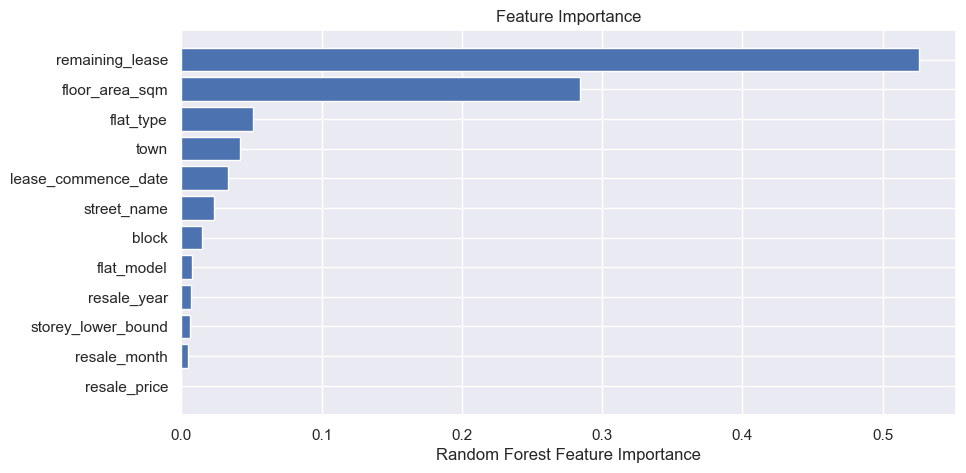

In [81]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()


## SAVING MODEL USING PICKLE

In [86]:
model=rf_regressor.fit(X_train, y_train)
model

RandomForestRegressor(random_state=42)

In [88]:
import pickle

# save the model to disk
filename = 'RandomForestRegressor_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

## Prediction

In [90]:
# get sample to predict the resale price
pre_df =df1.sample(n=5)
pre_df

town  flat_type  block  street_name  floor_area_sqm  flat_model  \
408005    25          3  150.0          323            73.0          16   
435341    21          4  669.0          448            85.0          29   
454355     1          3  457.0            4            88.0          15   
3296      16          3   63.0          166            66.0          17   
183569    18          3  323.0          256            64.0          19   

        lease_commence_date  resale_price  remaining_lease  resale_year  \
408005               1988.0      146000.0             68.0         2003   
435341               2000.0      240000.0             68.0         2004   
454355               1980.0      213000.0             68.0         2005   
3296                 1969.0       23240.0             68.0         1990   
183569               1985.0      170000.0             68.0         1998   

        resale_month  storey_lower_bound  storey_upper_bound  
408005             6                   1                   3  
435341             4                  10                  12  
454355             1                  13                  15  
3296               3                   7                   9  
183569             2                  10                  12

In [92]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

## PREDICT RESALE PRICE

In [94]:
# Make predictions on the sample
pre_pred = rf_regressor.predict(A)
pre_pred

array([150075.        , 229836.16666667, 210969.        ,  23215.        ,
       170130.        ])